<a href="https://colab.research.google.com/github/kishorekubendiran/Data_Preprocessing-Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

Step 1 | Data Pre-Processing

Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Importing the dataset

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/Yuvaranii/Data_Preprocessing/main/Social_Network_Ads.csv")
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Splitting the dataset into the Training set and Test set

In [4]:
Data.drop("User ID", axis = 1, inplace = True)

In [5]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
Column = ["Gender"]
Data["Gender"] = Data[Column].apply(Encoder.fit_transform)

In [6]:
Data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


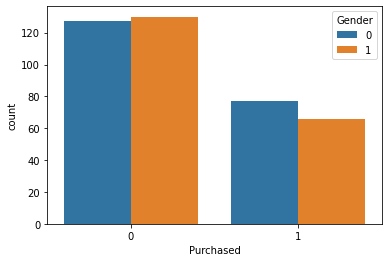

In [7]:
sns.countplot(x = "Purchased", hue = "Gender", data = Data)

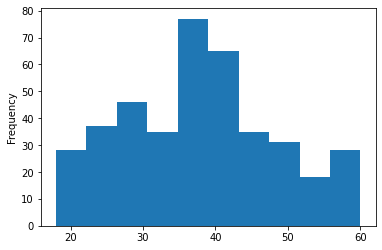

In [8]:
Data["Age"].plot.hist()

In [9]:
X = Data[["Gender", "Age", "EstimatedSalary"]]
Y = Data["Purchased"]

In [10]:
X_Train, X_Test, Y_Train, Y_Test =  train_test_split(X,Y, test_size = 0.2, random_state = 42) 

Feature Scaling

Step 2 | Logistic Regression Model

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

In [11]:
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Fitting Logistic Regression to the Training set

In [13]:
Result = model.fit (X_Train, Y_Train)

Step 3 | Predection

In [14]:
Result.predict([[1, 25, 150000]])

array([1])

Step 4 | Evaluating The Predection

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
Y_Pred = Result.predict(X_Test)
CM = confusion_matrix(Y_Test, Y_Pred)
CM

array([[50,  2],
       [ 7, 21]])

Text(33.0, 0.5, 'Truth')

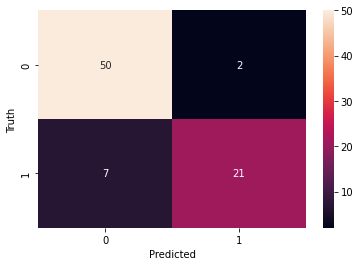

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [17]:
Result.score(X_Test, Y_Test)

0.8875